# CC Scheme

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from obspy import UTCDateTime, read_inventory
import xcorr

In [2]:
%matplotlib notebook

In [3]:
client = xcorr.Client(sds_root='/Users/psmets/Documents/Research/_data/WaveformArchive')

In [4]:
inv = read_inventory('../data/Monowai_new.xml')

<IPython.core.display.Javascript object>


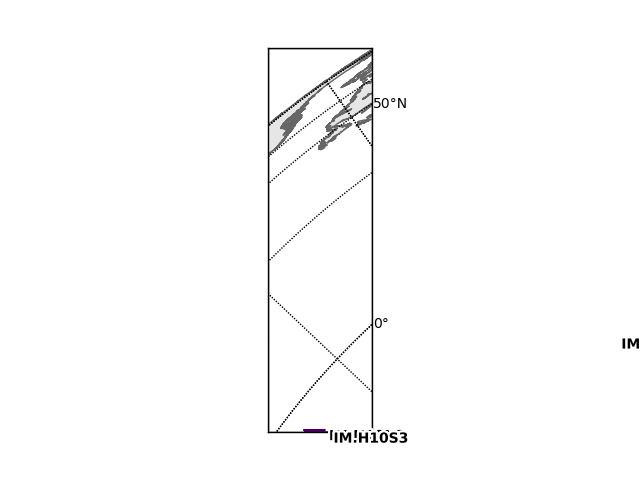

In [5]:
fig = inv.plot(color=0., projection='local')

<IPython.core.display.Javascript object>


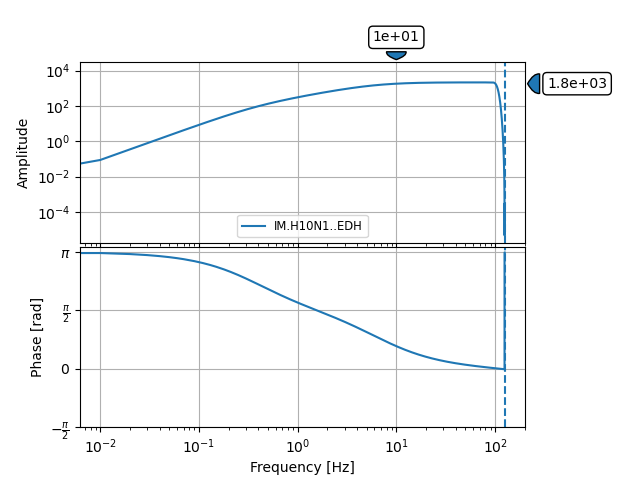

In [6]:
fig = inv.plot_response(0.01, station="H10N1")

## Get waveforms

In [7]:
EDH = client.get_waveforms(
    receiver = 'IM.H10N1..EDH', 
    time = pd.to_datetime('2015-01-15T12:00'), 
    verb = True,
)

Get waveforms for IM.H10N1..EDH from 2015-01-14 23:59:00 until 2015-01-16 00:01:00


<IPython.core.display.Javascript object>


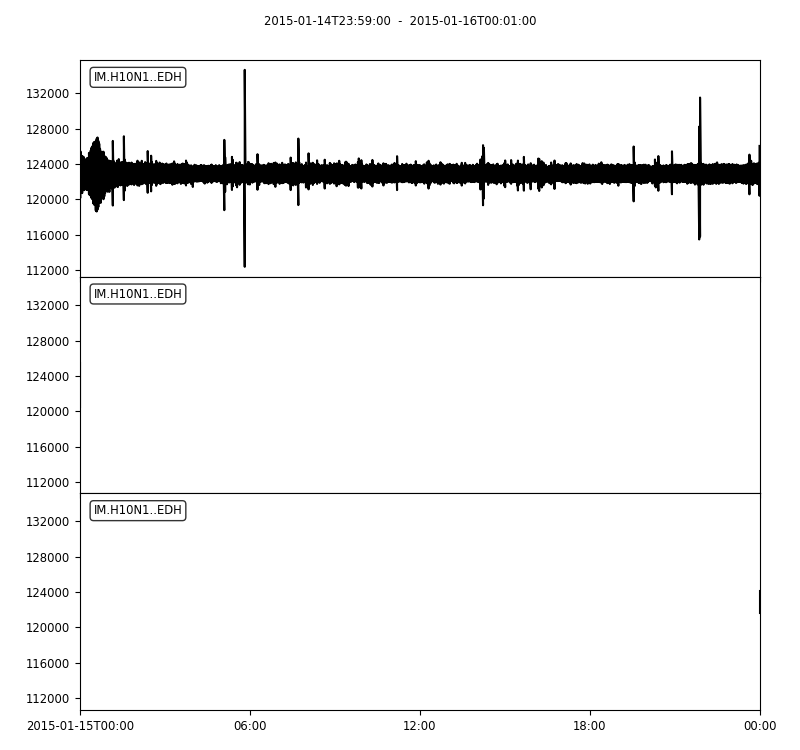

In [8]:
f = EDH.plot()

## Preprocess settings

In [9]:
# stream preprocess operations (sequential!)
preprocess = {
    'BHZ': [
        ('merge', { 'method': 1, 'fill_value': 'interpolate', 'interpolation_samples':0 }),
        ('filter', {'type':'highpass','freq':.05}),
        ('detrend', { 'type': 'demean' }),
        ('remove_response', {'output': 'VEL'}),
        ('filter', { 'type': 'highpass', 'freq': 3. }),
        ('interpolate', {'sampling_rate': 50, 'method':'lanczos', 'a':20 }),
        ('filter', { 'type': 'lowpass', 'freq': 20. }),
        ('trim', {}),
        ('detrend', { 'type': 'demean' }),
        ('taper', { 'type': 'cosine', 'max_percentage': 0.05, 'max_length': 30.}),
    ],
    'BHR': [
        ('merge', { 'method': 1, 'fill_value': 'interpolate', 'interpolation_samples':0 }),
        ('filter', {'type':'highpass','freq':.05}),
        ('detrend', { 'type': 'demean' }),
        ('remove_response', {'output': 'VEL'}),
        ('rotate', {'method':'->ZNE'}),
        ('rotate', {'method':'NE->RT', 'back_azimuth':250.39 }),
        ('select', {'channel':'BHR'}),
        ('filter', { 'type': 'highpass', 'freq': 3. }),
        ('interpolate', {'sampling_rate': 50, 'method':'lanczos', 'a':20 }),
        ('filter', { 'type': 'lowpass', 'freq': 20. }),
        ('trim', {}),
        ('detrend', { 'type': 'demean' }),
        ('taper', { 'type': 'cosine', 'max_percentage': 0.05, 'max_length': 30.}),
    ],
    'EDH': [
        ('merge', { 'method': 1, 'fill_value': 'interpolate', 'interpolation_samples':0 }),
        ('filter', {'type':'highpass','freq':.05}),
        ('detrend', { 'type': 'demean' }),
        ('remove_response', {}),
        ('filter', { 'type': 'bandpass', 'freqmin': 3., 'freqmax': 20. }),
        ('decimate', { 'factor': 5 }),
        ('trim', {}),
        ('detrend', { 'type': 'demean' }),
        ('taper', {'type': 'cosine', 'max_percentage': 0.05, 'max_length': 30.}),
    ],
}


pp_sens = preprocess.copy()
pp_sens['EDH'] = [
    ('merge', { 'method': 1, 'fill_value': 'interpolate', 'interpolation_samples':0 }),
    ('filter', {'type':'highpass','freq':.05}),
    ('detrend', { 'type': 'demean' }),
    ('remove_sensitivity', {}),
    ('filter', { 'type': 'bandpass', 'freqmin': 3., 'freqmax': 20. }),
    ('decimate', { 'factor': 5 }),
    ('trim', {}),
    ('detrend', { 'type': 'demean' }),
    ('taper', {'type': 'cosine', 'max_percentage': 0.05, 'max_length': 30.}),
]
pp_resp = preprocess.copy()
pp_resp['EDH'] = [
    ('merge', { 'method': 1, 'fill_value': 'interpolate', 'interpolation_samples':0 }),
    ('filter', {'type':'highpass','freq':.05}),
    ('detrend', { 'type': 'demean' }),
    ('remove_response', {}),
    ('filter', { 'type': 'bandpass', 'freqmin': 3., 'freqmax': 20. }),
    ('decimate', { 'factor': 5 }),
    ('trim', {}),
    ('detrend', { 'type': 'demean' }),
    ('taper', {'type': 'cosine', 'max_percentage': 0.05, 'max_length': 30.}),
]

In [10]:
H10_resp = client.get_preprocessed_waveforms(
    receiver = 'IM.H10N1..EDH', 
    time = pd.to_datetime('2015-01-15T12:00'), 
    preprocess = pp_resp,
    inventory = inv,
    verb = 0,
)

<IPython.core.display.Javascript object>


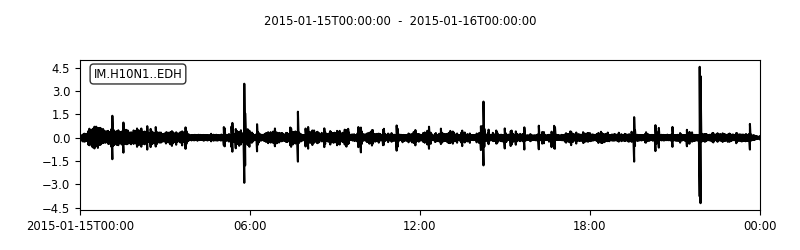

In [11]:
f = H10_resp.plot()

In [12]:
H10_sens = client.get_preprocessed_waveforms(
    receiver = 'IM.H10N1..EDH', 
    time = pd.to_datetime('2015-01-15T12:00'), 
    preprocess = pp_sens,
    inventory = inv,
    verb = 0,
)

<IPython.core.display.Javascript object>


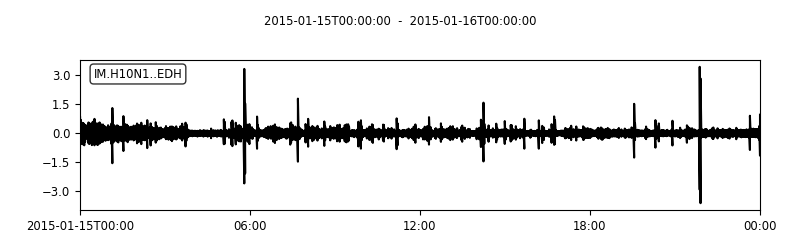

In [13]:
f = H10_sens.plot()

In [ ]:
H03 = client.get_preprocessed_waveforms(
    receiver = 'IM.H03S1..EDH', 
    time = pd.to_datetime('2015-01-15T12:00'), 
    preprocess = preprocess,
    inventory = inv,
    verb = 0,
)

In [ ]:
f = H03.plot()

In [ ]:
BHZ = client.get_preprocessed_waveforms(
    receiver = 'IU.RAR.10.BHZ', 
    time = pd.to_datetime('2015-01-15T12:00'), 
    preprocess = preprocess,
    inventory = inv,
    verb = True,
)

In [ ]:
BHZ.plot()

In [ ]:
BHR = client.get_preprocessed_waveforms(
    receiver = 'IU.RAR.10.BHR', 
    time = pd.to_datetime('2016-01-15T12:00'), 
    preprocess = preprocess,
    inventory = inv,
    verb = 2,
)

In [ ]:
BHR.plot()

## Preprocessed pair stream

In [14]:
pair = client.get_pair_preprocessed_waveforms(
    pair = 'IM.H03S1..EDH-IU.RAR.10.BHZ',
    time = pd.to_datetime('2015-01-15T12:00'), 
    preprocess = preprocess,
    inventory = inv,
    verb = 2,
)

Get waveforms for IM.H03S1..EDH from 2015-01-14 23:59:00 until 2015-01-16 00:01:00
Apply preprocessing operations:
 * merge : {'method': 1, 'fill_value': 'interpolate', 'interpolation_samples': 0}
 * filter : {'type': 'highpass', 'freq': 0.05}
 * detrend : {'type': 'demean'}
 * remove_response : {'inventory': <obspy.core.inventory.inventory.Inventory object at 0x11d08f490>}


/Users/psmets/Documents/Research/_progs/_Python/xcorr/xcorr/preprocess/operations.py:354: UserWarning: Failed to execute operation "remove_response". Skipped to next. Returned error: Can not use evalresp on response with no response stages.
  warnings.warn(msg, UserWarning)


 * filter : {'type': 'bandpass', 'freqmin': 3.0, 'freqmax': 20.0}
 * decimate : {'factor': 5}
 * trim : {'starttime': UTCDateTime(2015, 1, 15, 0, 0), 'endtime': UTCDateTime(2015, 1, 16, 0, 0)}
 * detrend : {'type': 'demean'}
 * taper : {'type': 'cosine', 'max_percentage': 0.05, 'max_length': 30.0}
Get waveforms for IU.RAR.10.BHZ from 2015-01-14 23:59:00 until 2015-01-16 00:01:00
Apply preprocessing operations:
 * merge : {'method': 1, 'fill_value': 'interpolate', 'interpolation_samples': 0}
 * filter : {'type': 'highpass', 'freq': 0.05}
 * detrend : {'type': 'demean'}
 * remove_response : {'output': 'VEL', 'inventory': <obspy.core.inventory.inventory.Inventory object at 0x11d08f490>}
 * filter : {'type': 'highpass', 'freq': 3.0}
 * interpolate : {'sampling_rate': 50, 'method': 'lanczos', 'a': 20}
 * filter : {'type': 'lowpass', 'freq': 20.0}
 * trim : {'starttime': UTCDateTime(2015, 1, 15, 0, 0), 'endtime': UTCDateTime(2015, 1, 16, 0, 0)}
 * detrend : {'type': 'demean'}
 * taper : {'ty

<IPython.core.display.Javascript object>


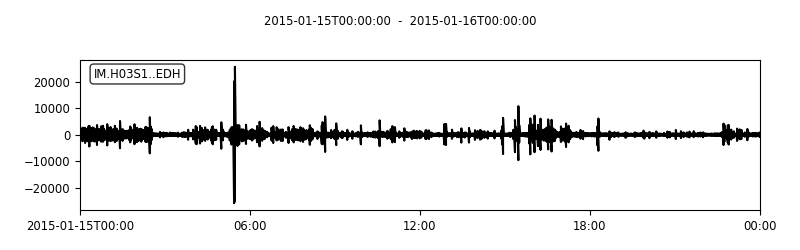

In [19]:
f = pair[0].plot()

<IPython.core.display.Javascript object>


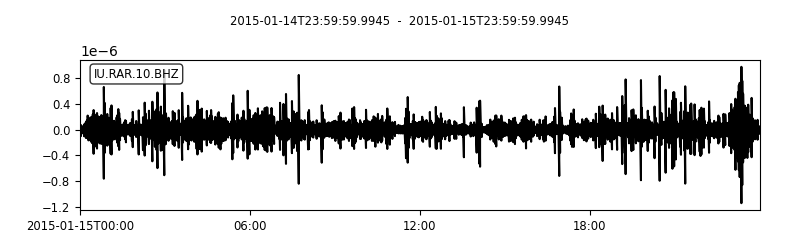

In [18]:
f = pair[1].plot()

## Hash

In [ ]:
%%timeit
xcorr.util.hasher.hash_Stream(pair)

In [ ]:
xcorr.util.hasher.hash(pair)

# Verify data availability

In [ ]:
pairs = [
    'IM.H10N1..EDH-IU.RAR.10.BHZ',
    'IM.H10N1..EDH-IU.RAR.10.BHR',
    'IM.H03S1..EDH-IU.RAR.10.BHZ',
    'IM.H03S1..EDH-IU.RAR.10.BHR',
]
times = pd.date_range('2014-12-31', '2015-02-01', freq='1D')

In [ ]:
status = client.data_availability(pairs, times, verb=2, download=False)

In [ ]:
status

Or in separate steps to control dask delayed compute:

In [ ]:
status = client.init_data_availability(pairs, times)
delayed_status = client.verify_data_availability(status, download=False, compute=False)

In [ ]:
status.receiver

In [ ]:
delayed_status.visualize()

In [ ]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    verified = delayed_status.compute()

In [ ]:
status